# Grouping

#### Modules

In [200]:
%matplotlib inline
from IPython.display import Image

In [201]:
import pandas as pd
import seaborn as sns
sns.set_style('white')
import altair as alt

#### Import data

In [202]:
nycflights13_original = pd.read_csv('../../data/nycflights13.csv')

In [203]:
nycflights13_original.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


#### Group flights by number and origin 

In [204]:
# copy of original dataset
nycflights13 = nycflights13_original.copy() 

In [205]:
#select
nycflights13 = nycflights13[['month', 'origin', 'dest']]

#groupby
nycflights13 = (nycflights13
 .groupby(['month', 'origin'])['dest']
 .count()
 .reset_index())

#rename
nycflights13.columns = ['month', 'origin', 'count']

In [206]:
nycflights13

,month,origin,count
0,1,EWR,9893
1,1,JFK,9161
2,1,LGA,7950
3,2,EWR,9107
4,2,JFK,8421
5,2,LGA,7423
6,3,EWR,10420
7,3,JFK,9697
8,3,LGA,8717
9,4,EWR,10531


#### Visualise

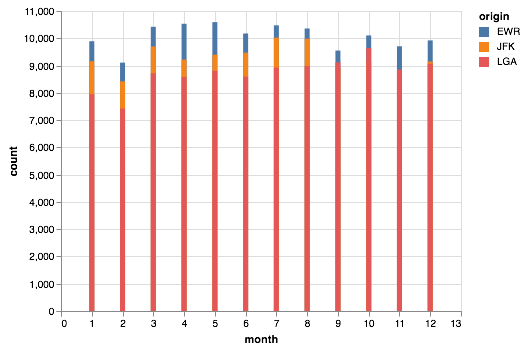

In [207]:
alt.Chart(nycflights13).mark_bar().encode(
    x='month',
    y='count', 
    color='origin'
)